#  DSP LAB Experiment 6
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 05/11/2021<br>

GITHUB LINK:https://github.com/ramyashri1887/DSP-LAB 

In [15]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import time
#imports 
import numpy as np 
import matplotlib.pyplot as plt 
import IPython.display as ipd
import librosa 
import librosa.display
#libraries used 

# system sample rate
fs = 48000
# a range of frequencies
freqRange = np.linspace(0,fs/2,fs)

# define an ideal low pass filter with cutoff at 1000 Hz
fc = 1000
# desired system frequency response
iFreqResp = []
for f in freqRange:
    if f < fc:
        iFreqResp.append(1)
    else:
        iFreqResp.append(0)



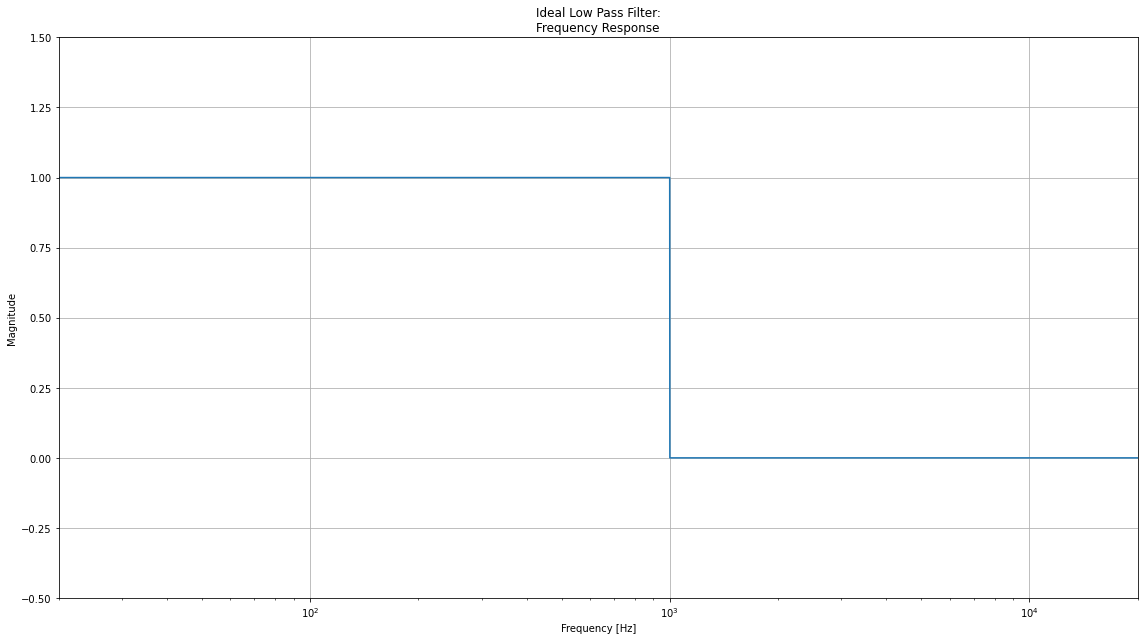

In [3]:
# plot frequency response of ideal low-pass filter
plt.figure(figsize=[16,9])
plt.title('Ideal Low Pass Filter:\nFrequency Response')
plt.semilogx(freqRange,iFreqResp)
plt.ylabel('Magnitude')
plt.ylim([-0.5,1.5])
plt.xlabel('Frequency [Hz]')
plt.xlim([20, 20000])
plt.grid()
plt.tight_layout()
plt.savefig('IdealFreqResponse.png', bbox_inches="tight")
#plt.show()

# use the inverse fft to create a corresponding impulse response
iTimeResp = np.fft.ifft(iFreqResp)
# only the first half of this impulse corresponds with the causal portion
iTimeResp = 2*iTimeResp[0:round(len(iTimeResp)/2)]
# create a range of time values for plotting
tRange = np.linspace(0,len(iTimeResp)-1,len(iTimeResp))



C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


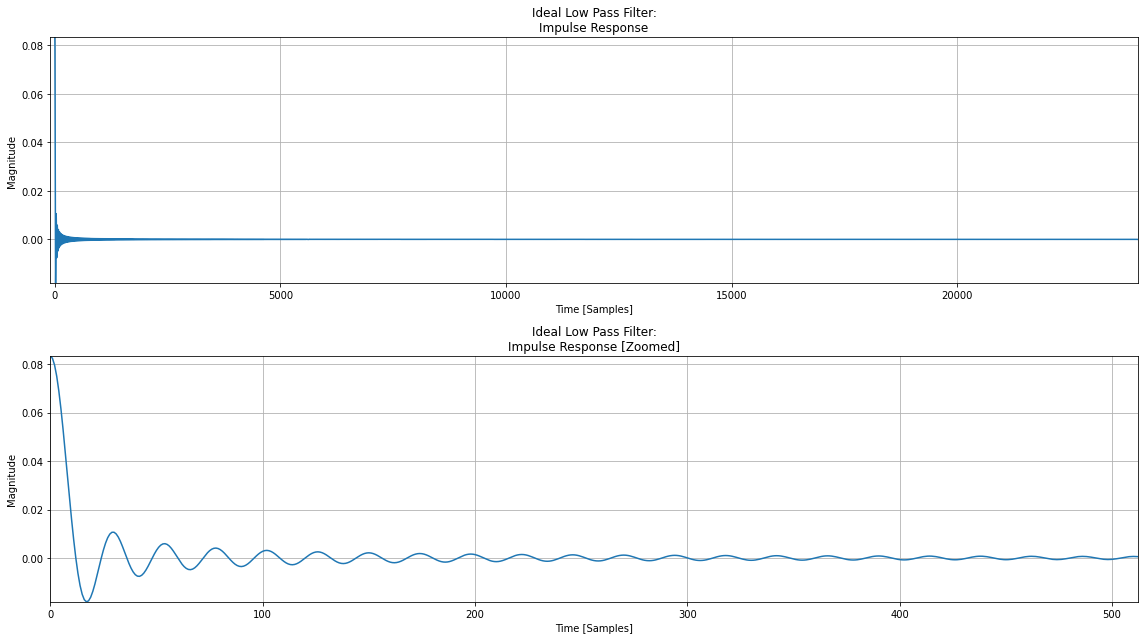

In [6]:
# plot the impulse response
plt.figure(figsize=[16,9])
plt.subplot(2, 1, 1)
plt.title('Ideal Low Pass Filter:\nImpulse Response')
plt.plot(tRange,iTimeResp)
plt.ylabel('Magnitude')
plt.ylim([min(iTimeResp),max(iTimeResp)])
plt.xlabel('Time [Samples]')
plt.xlim([-100, len(tRange)])
plt.grid()
plt.subplot(2, 1, 2)
plt.title('Ideal Low Pass Filter:\nImpulse Response [Zoomed]')
plt.plot(tRange,iTimeResp)
plt.ylabel('Magnitude')
plt.ylim([min(iTimeResp),max(iTimeResp)])
plt.xlabel('Time [Samples]')
plt.xlim([0, 512])
plt.grid()
plt.tight_layout()
plt.show()



C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


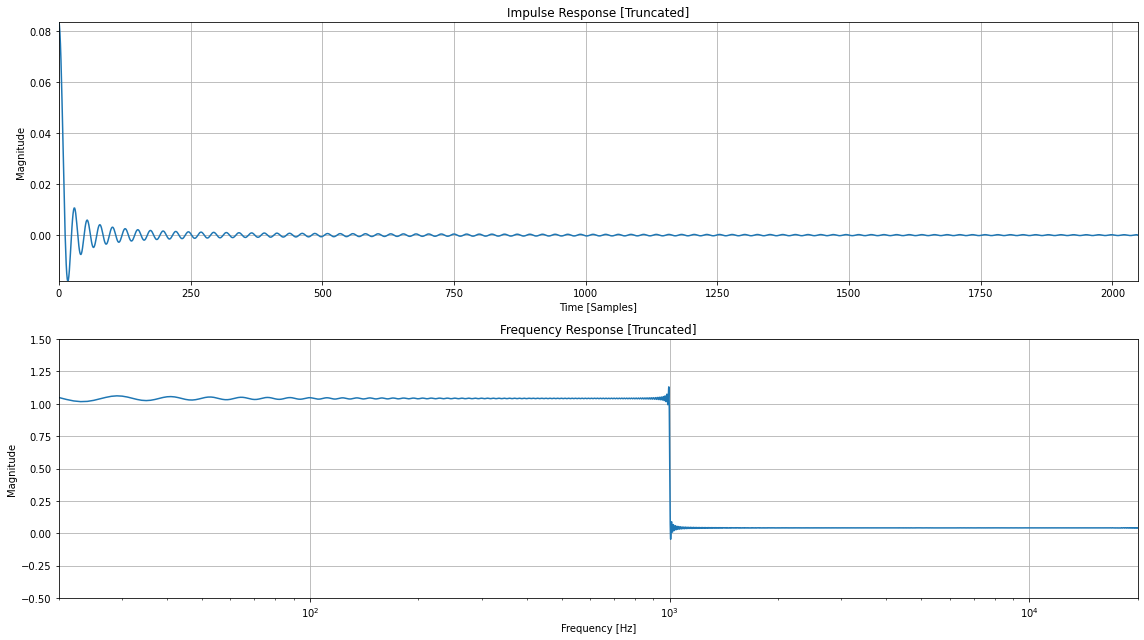

In [7]:
# hard truncate the impulse response to an acceptable number of coefficients
nCoeff = 2048
iTimeRespTrunc = np.concatenate([iTimeResp[0:nCoeff],
                                np.zeros(len(iTimeResp) - nCoeff)])
# get the frequency response
iFreqResp = np.fft.fft(iTimeRespTrunc,len(iTimeRespTrunc))
# a range of frequencies
freqRange = np.linspace(0,fs/2,len(iTimeRespTrunc))

# plot the impulse and frequency response
plt.figure(figsize=[16,9])
plt.subplot(2, 1, 1)
plt.title('Impulse Response [Truncated]')
plt.plot(tRange,iTimeRespTrunc)
plt.ylabel('Magnitude')
plt.ylim([min(iTimeRespTrunc),max(iTimeRespTrunc)])
plt.xlabel('Time [Samples]')
plt.xlim([0, len(tRange[0:nCoeff])])
plt.grid()
plt.subplot(2, 1, 2)
plt.title('Frequency Response [Truncated]')
plt.semilogx(freqRange,np.real(iFreqResp))
plt.ylabel('Magnitude')
plt.ylim([-0.5,1.5])
plt.xlabel('Frequency [Hz]')
plt.xlim([20, 20000])
plt.grid()
plt.tight_layout()
plt.savefig('TruncatedResponse.png', bbox_inches="tight")
plt.show()



C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: 

C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casti

C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casti

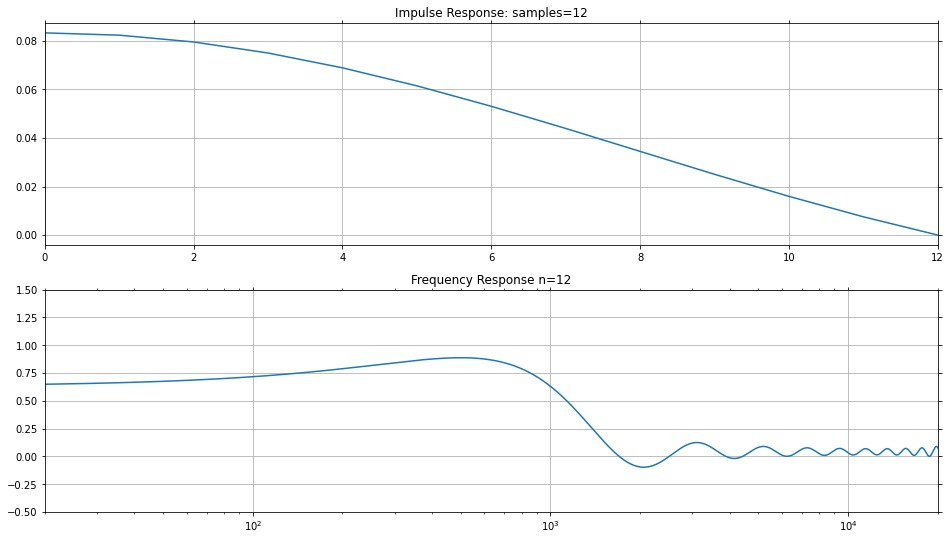

In [9]:
# set up figure
fig = plt.figure(figsize=[16,9])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_ylabel('Magnitude')
ax1.set_ylim([min(iTimeResp),max(iTimeResp)])
ax1.set_xlabel('Time [Samples]')

ax2.set_ylabel('Magnitude')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylim([-0.5,1.5])
ax2.set_xlim([20, 20000])
#plt.show(block=False)
count = 0
for n in range(512, 8, -4):
    # print(n)
    # clear the plots
    ax1.cla()
    ax2.cla()
    # adjust plot titles
    ax1.set_title('Impulse Response: samples={}'.format(n))
    ax2.set_title('Frequency Response n={}'.format(n))
    # replotting for a new number of coefficients
    nCoeff = n
    iTimeRespTrunc = np.concatenate([iTimeResp[0:nCoeff],
                                    np.zeros(len(iTimeResp) - nCoeff)])
    # adjust data
    iFreqResp = np.fft.fft(iTimeRespTrunc,len(iTimeRespTrunc))
    # a range of frequencies
    freqRange = np.linspace(0,fs/2,len(iTimeRespTrunc))
    # plot the data
    ax1.plot(tRange, iTimeRespTrunc)
    ax2.semilogx(freqRange,np.real(iFreqResp))
    # re-adjust the range
    ax1.set_xlim([0, n])
    ax2.set_ylim([-0.5,1.5])
    ax2.set_xlim([20,20000])
    ax1.grid(True)
    ax2.grid(True)
    a = str(count).zfill(8)




C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


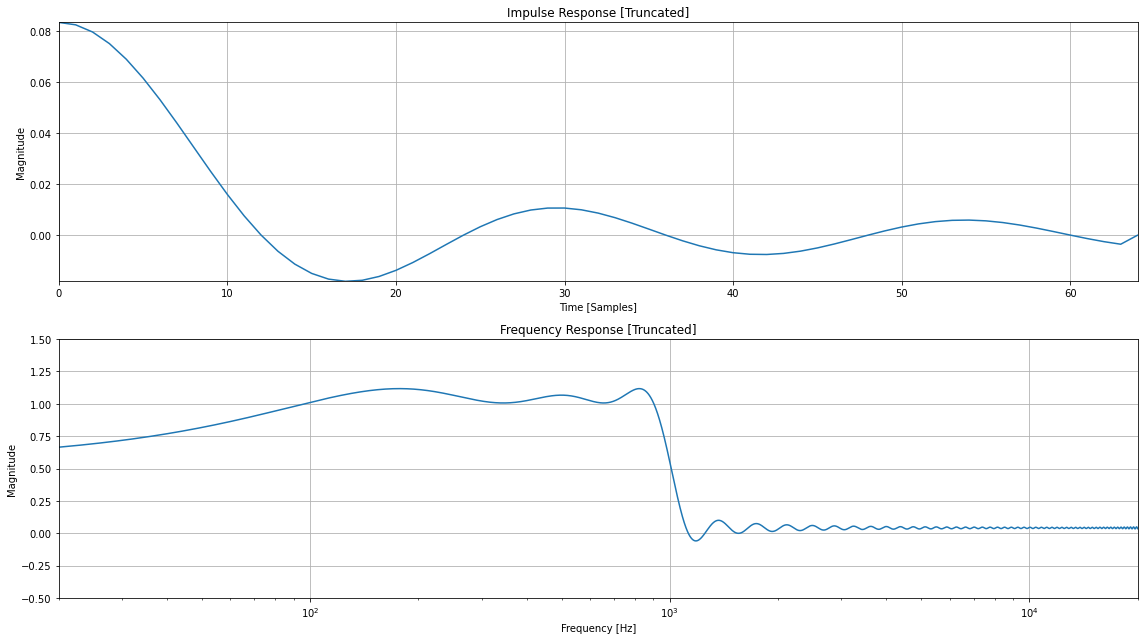

In [10]:

# now lets really do the truncation
# Hard truncate the impulse response to an acceptable number of coefficients
nCoeff = 64
iTimeRespTrunc = np.concatenate([iTimeResp[0:nCoeff],
                                np.zeros(len(iTimeResp) - nCoeff)])
# frequency response
iFreqResp = np.fft.fft(iTimeRespTrunc,len(iTimeRespTrunc))
# a range of frequencies
freqRange = np.linspace(0,fs/2,len(iTimeRespTrunc))

plt.figure(figsize=[16,9])
plt.subplot(2, 1, 1)
plt.title('Impulse Response [Truncated]')
plt.plot(tRange,iTimeRespTrunc)
plt.ylabel('Magnitude')
plt.ylim([min(iTimeRespTrunc),max(iTimeRespTrunc)])
plt.xlabel('Time [Samples]')
plt.xlim([0, len(tRange[0:nCoeff])])
plt.grid()
plt.subplot(2, 1, 2)
plt.title('Frequency Response [Truncated]')
plt.semilogx(freqRange,np.real(iFreqResp))
plt.ylabel('Magnitude')
plt.ylim([-0.5,1.5])
plt.xlabel('Frequency [Hz]')
plt.xlim([20, 20000])
plt.grid()
plt.tight_layout()
plt.savefig('TruncatedResponse_64Coefficient.png', bbox_inches="tight")



<ipython-input-24-aca20eabee93>:16: RuntimeWarning: divide by zero encountered in log10
  response = 20.0 * np.log10(np.real(mag))


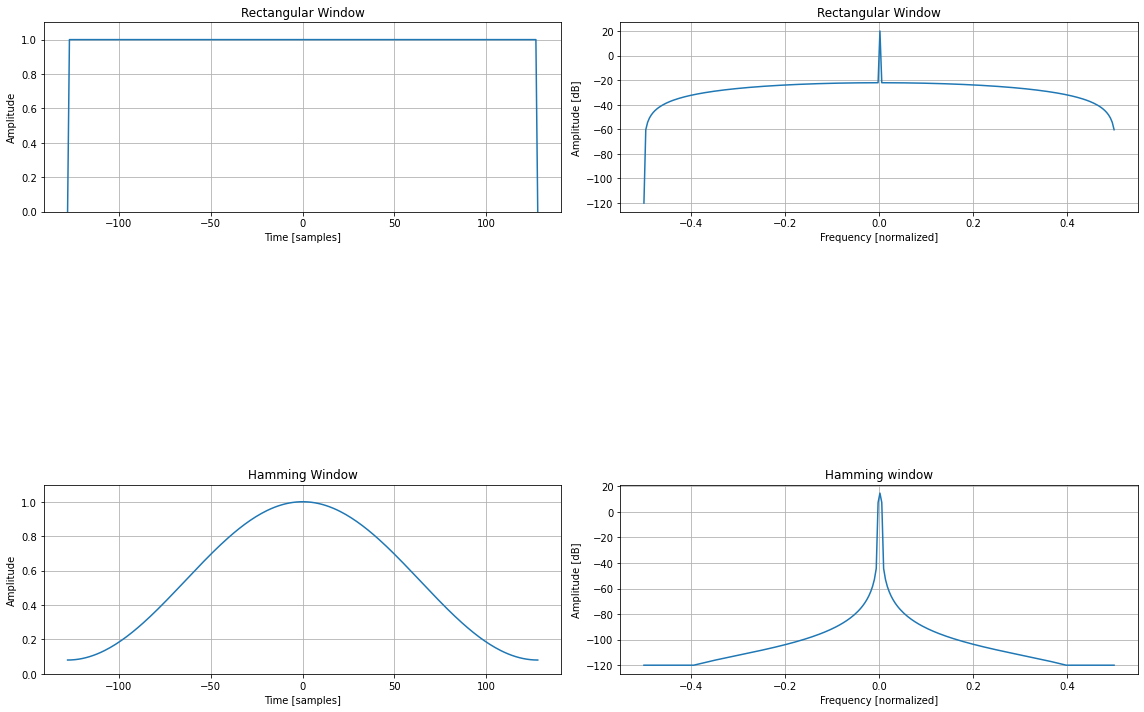

In [24]:
nCoeff = 128
# compare windowing functions use 128+ samples for acceptable frequency graph
negposTRange = np.linspace(-nCoeff,nCoeff,nCoeff*2)
boxcar_window = scipy.signal.windows.boxcar(nCoeff*2)
boxcar_window[0] = 0
boxcar_window[len(boxcar_window)-1] = 0

hamming_window = scipy.signal.windows.hamming(nCoeff*2)

# this function just gets the frequency response and frequency range for each window...
# make life easier
def getFreqResponse(window):
    A = np.fft.fft(window, len(window)) / 25.5
    mag = np.abs(np.fft.fftshift(A))
    freq = np.linspace(-0.5, 0.5, len(A))
    response = 20.0 * np.log10(np.real(mag))
    response = np.clip(response, -120, 120)
    return freq, response
boxcar_windowResponse = getFreqResponse(boxcar_window)

hamming_windowResponse = getFreqResponse(hamming_window)

# plot time domain response and frequency response
plt.figure(figsize=[16,10])
plt.subplot(3, 2, 1)
plt.plot(negposTRange, boxcar_window)
plt.title("Rectangular Window")
plt.ylabel("Amplitude")
plt.ylim([0,1.1])
plt.xlabel("Time [samples]")
plt.grid()
plt.subplot(3, 2, 2)
plt.plot(boxcar_windowResponse[0], boxcar_windowResponse[1])
plt.title("Rectangular Window")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [normalized]")
plt.grid()
plt.tight_layout()



plt.subplot(3, 2, 5)
plt.plot(negposTRange, hamming_window)
plt.title("Hamming Window")
plt.ylabel("Amplitude")
plt.ylim([0,1.1])
plt.xlabel("Time [samples]")
plt.grid()
plt.subplot(3, 2, 6)
plt.plot(hamming_windowResponse[0], hamming_windowResponse[1])
plt.title("Hamming window")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [normalized]")
plt.grid()
plt.tight_layout()


# okay so now back to our truncated  impulse response...
# let's do truncation and apply the windowing function...
nCoeff = 64
# make double wide window...
boxcar_window = scipy.signal.windows.boxcar(nCoeff*2)

hamming_window = scipy.signal.windows.hamming(nCoeff*2)

# take only the positive portion of the window and...
# make the array the same length as the impulse response
iTimeRespTrunc = np.concatenate([iTimeResp[0:nCoeff],
                                np.zeros(len(iTimeResp) - nCoeff)])
boxcar_window = np.concatenate([boxcar_window[nCoeff:],
                                 np.zeros(len(iTimeRespTrunc) - nCoeff)])
boxcar_window = boxcar_window * iTimeRespTrunc


hamming_window = np.concatenate([hamming_window[nCoeff:],
                                 np.zeros(len(iTimeRespTrunc) - nCoeff)])
hamming_window = hamming_window * iTimeRespTrunc

# get frequency response of windowed responses...
iFreqResp_boxcar = np.fft.fft(np.real(boxcar_window),len(boxcar_window))


iFreqResp_hamming = np.fft.fft(np.real(hamming_window),len(hamming_window))
# a range of frequencies
freqRange = np.linspace(0,fs/2,len(hamming_window))



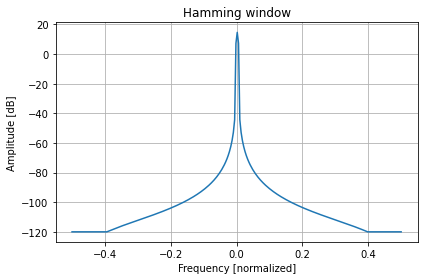

C:\Users\DPK\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\SOFTWARES\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


boxcar 	 [ 8.33333333e-02  8.23853705e-02  7.95802622e-02  7.50324607e-02
  6.89265270e-02  6.15081870e-02  5.30724783e-02  4.39496137e-02
  3.44893028e-02  2.50443484e-02  1.59543676e-02  7.53047011e-03
  4.16666667e-05 -6.29632328e-03 -1.13293315e-02 -1.49697024e-02
 -1.71977717e-02 -1.80598695e-02 -1.76630411e-02 -1.61668525e-02
 -1.37727978e-02 -1.07119427e-02 -7.23151946e-03 -3.58122919e-03
  1.75785312e-19  3.29609337e-03  6.12412919e-03  8.34235545e-03
  9.85556449e-03  1.06176265e-02  1.06311492e-02  9.94439694e-03
  8.64575140e-03  6.85613227e-03  4.71989554e-03  2.39480012e-03
  4.16666667e-05 -2.18565131e-03 -4.14940381e-03 -5.73568118e-03
 -6.86034545e-03 -7.47287221e-03 -7.55795439e-03 -7.13485938e-03
 -6.25466710e-03 -4.99564091e-03 -3.45708848e-03 -1.75214972e-03
 -6.01370805e-20  1.68202372e-03  3.18587864e-03  4.41940083e-03
  5.31163558e-03  5.81662064e-03  5.91543631e-03  5.61645107e-03
  4.95380738e-03  3.98430218e-03  2.78291309e-03  1.43730003e-03
  4.16666667e-05

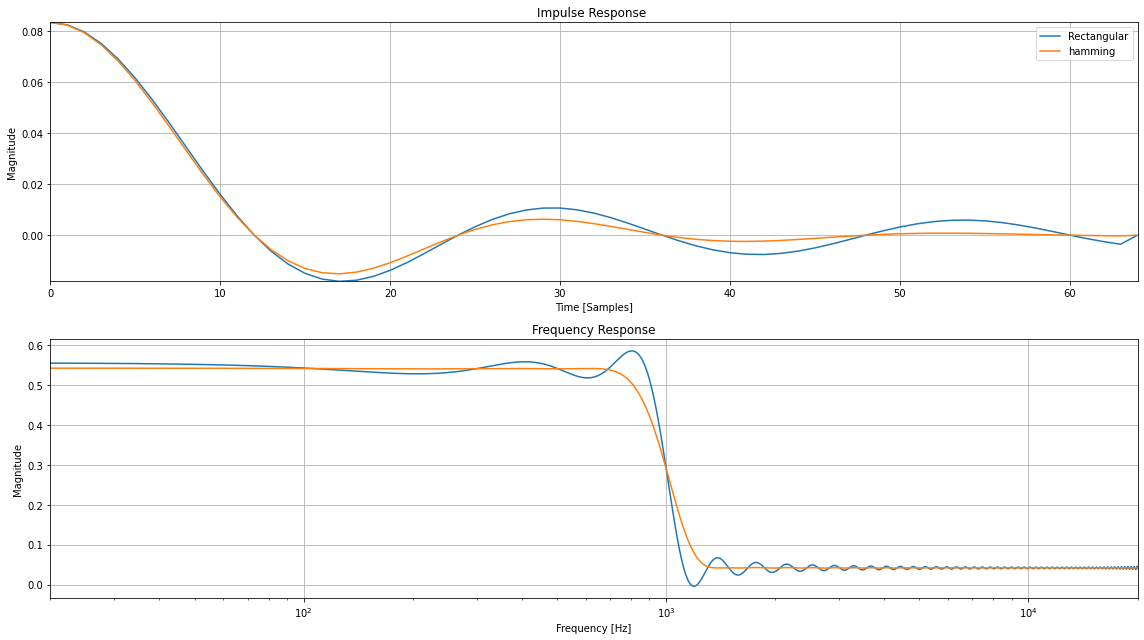

In [26]:
# okay so now back to our truncated  impulse response...
# let's do truncation and apply the windowing function...
nCoeff = 64
# make double wide window...
boxcar_window = scipy.signal.windows.boxcar(nCoeff*2)
hamming_window = scipy.signal.windows.hamming(nCoeff*2)
# take only the positive portion of the window and...
# make the array the same length as the impulse response
iTimeRespTrunc = np.concatenate([iTimeResp[0:nCoeff],
                                np.zeros(len(iTimeResp) - nCoeff)])
boxcar_window = np.concatenate([boxcar_window[nCoeff:],
                                 np.zeros(len(iTimeRespTrunc) - nCoeff)])
boxcar_window = boxcar_window * iTimeRespTrunc


hamming_window = np.concatenate([hamming_window[nCoeff:],
                                 np.zeros(len(iTimeRespTrunc) - nCoeff)])
hamming_window = hamming_window * iTimeRespTrunc

# get frequency response of windowed responses...
iFreqResp_boxcar = np.fft.fft(np.real(boxcar_window),len(boxcar_window))
iFreqResp_hamming = np.fft.fft(np.real(hamming_window),len(hamming_window))
# a range of frequencies
freqRange = np.linspace(0,fs/2,len(hamming_window))

plt.figure(figsize=[16,9])
plt.subplot(2, 1, 1)
plt.title('Impulse Response ')
plt.plot(tRange,np.real(boxcar_window), label='Rectangular')
plt.plot(tRange,np.real(hamming_window), label='hamming')
plt.ylabel('Magnitude')
plt.ylim([min(boxcar_window),max(boxcar_window)])
plt.xlabel('Time [Samples]')
plt.xlim([0, len(tRange[0:nCoeff])])
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.title('Frequency Response')
plt.semilogx(freqRange,iFreqResp_boxcar, label='Rectangular')
plt.semilogx(freqRange,iFreqResp_hamming, label='hamming')
plt.ylabel('Magnitude')
#plt.ylim([-0.5,1.5])
plt.xlabel('Frequency [Hz]')
plt.xlim([20, 20000])
plt.grid()
plt.tight_layout()

# print coefficients...
print('boxcar \t', np.real(boxcar_window[0:nCoeff]) )
print('hamming_window \t', np.real(hamming_window[0:nCoeff]) )

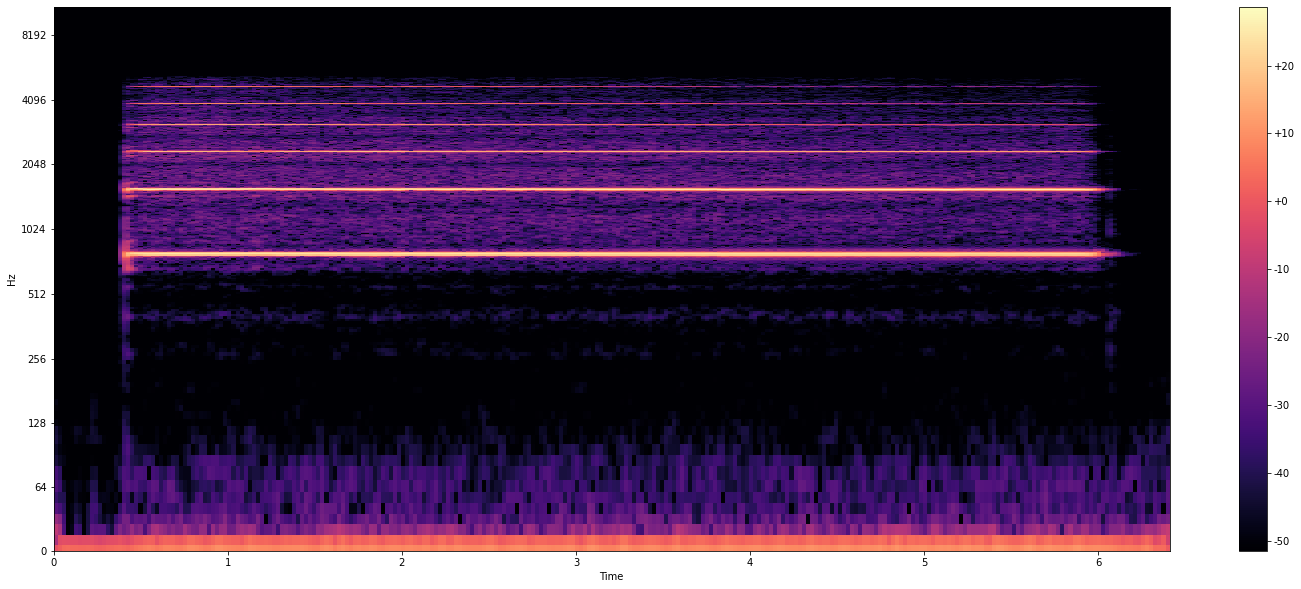

In [16]:
#1. Plot the spectrogram of the instruα.wav. 
#You may use any window of your choice and sample duration for the window. Can you now locate the fundamental pitch?

FRAME_SIZE=2048 #powers of two , for reasons like spectral leakage 
HOP_SIZE=512 #same , powers of 2
x,sr= librosa.load("instru3.wav")
x_scale=librosa.stft(x,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
#finding the abs value to plot a spectogram 
x_spec= abs(x_scale)**2
#spectogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")
#converting to log scale, for beter visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_log_spec,sr,HOP_SIZE,y_axis="log")



## Problem 1. (Window Functions) 


In [67]:
def plotting_func(X,sampling_rate):
  N = len(X)
  n = np.arange(N)
  T = N/sampling_rate
  freq = n/T 

  plt.figure(figsize = (10, 6))
  plt.stem(freq, abs(X)/N, 'y',markerfmt=" ", basefmt="-b")

  plt.xlabel('Freq (Hz)')
  plt.ylabel('DFT Amplitude')
  plt.show()

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

In [68]:
sr2=20
time = np.arange(0,10,1/sr2)

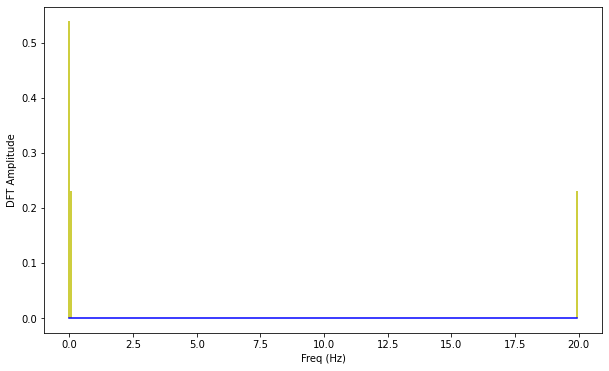

In [78]:
N=256
sum=scipy.signal.windows.hamming(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

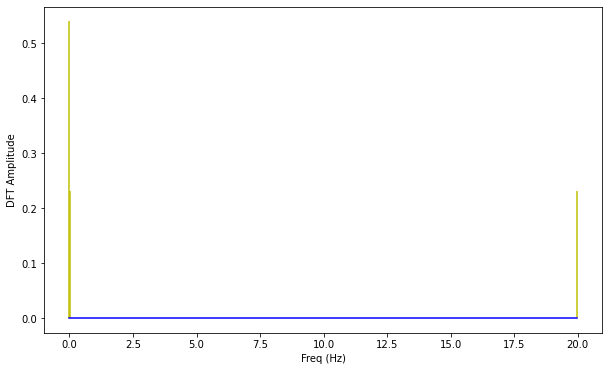

In [79]:
N=512
sum=scipy.signal.windows.hamming(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

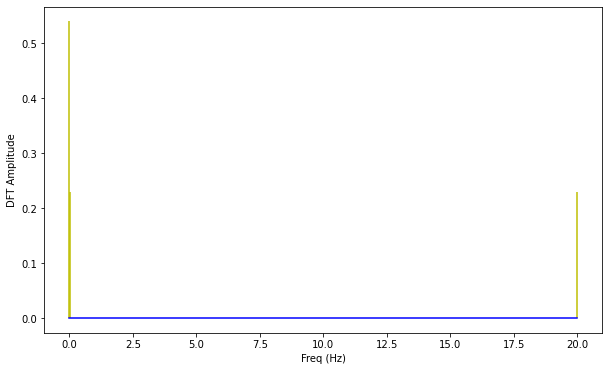

In [80]:
N=1024
sum=scipy.signal.windows.hamming(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

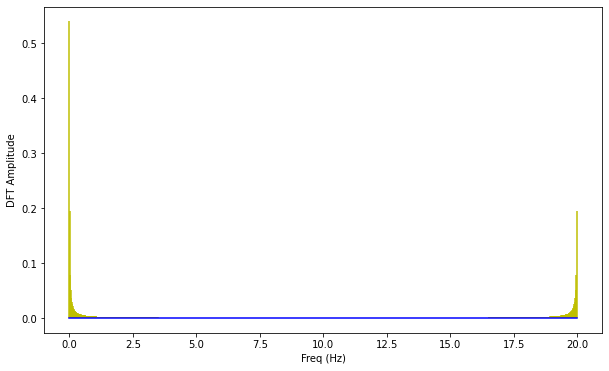

In [81]:
N=2048
sum=scipy.signal.windows.hamming(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

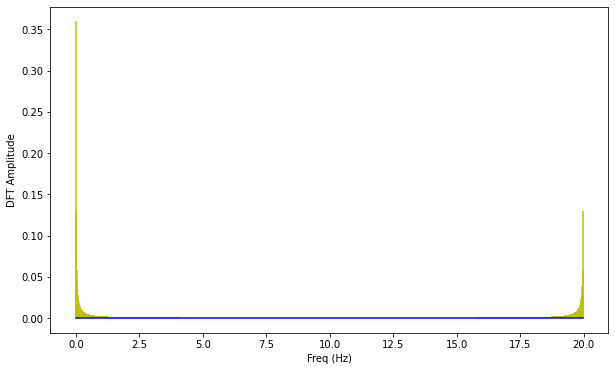

In [83]:
N=3000
sum=scipy.signal.windows.hamming(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

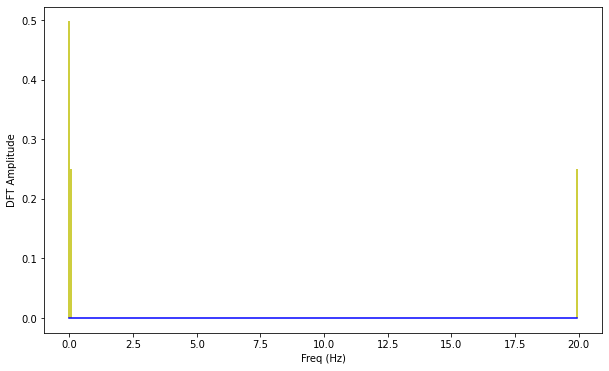

In [84]:
N=256
sum=scipy.signal.windows.hann(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

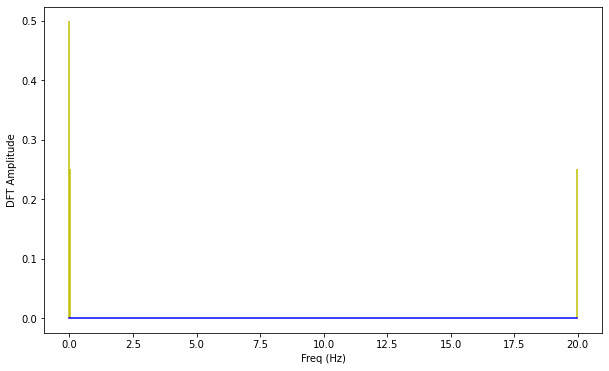

In [85]:
N=512
sum=scipy.signal.windows.hann(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

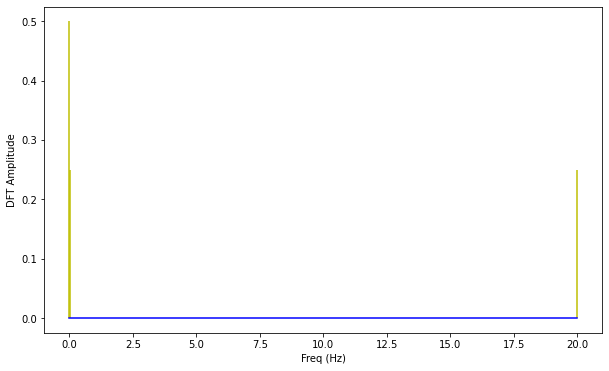

In [86]:
N=1024
sum=scipy.signal.windows.hann(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

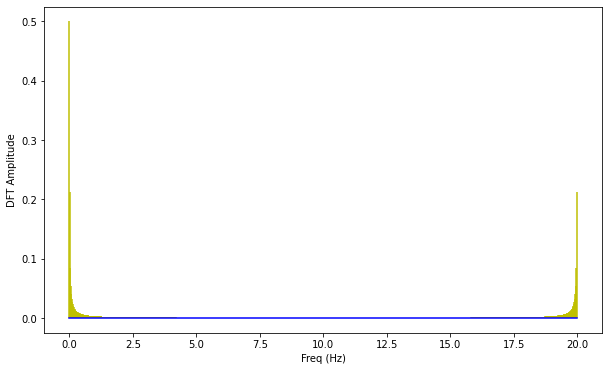

In [87]:
N=2048
sum=scipy.signal.windows.hann(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)

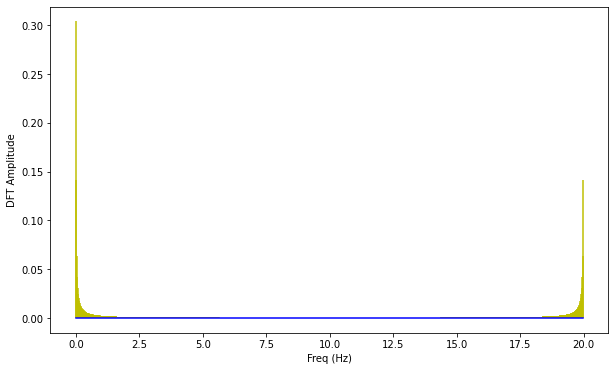

In [88]:
N=3000
sum=scipy.signal.windows.hann(N, sym=True)
sum_1024=sum[0:1024]
X_1024 = DFT(sum_1024)
plotting_func(X_1024,sr2)